In [32]:
import embedding as emb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
## import train and test data
train = pd.read_csv('data/train_2021-12-24.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99144 entries, 0 to 99143
Data columns (total 19 columns):
adv_date              99144 non-null object
sld_date              99144 non-null object
make_date             99144 non-null object
Sale_Price            99144 non-null float64
Odometer              99119 non-null float64
Power                 99090 non-null float64
Fuel_Urban            87810 non-null float64
Make_Code             99144 non-null object
Family_Code           99144 non-null object
Region_Description    99144 non-null object
Vehicle_Code          99144 non-null int64
inventory_days        99144 non-null int64
age_list_day          99144 non-null int64
age_sell_day          99144 non-null int64
km_per_day            99119 non-null float64
fuel_per_power        87810 non-null float64
odo_per_fuel          87789 non-null float64
odo_per_power         99065 non-null float64
pow_times_odo         99065 non-null float64
dtypes: float64(9), int64(4), object(6)
memory usa

In [4]:
train.select_dtypes('object').columns

Index(['adv_date', 'sld_date', 'make_date', 'Make_Code', 'Family_Code',
       'Region_Description'],
      dtype='object')

In [5]:
cat_cols = ['Make_Code', 'Family_Code', 'Region_Description']


embedding_info = emb.get_embedding_info(train,categorical_variables=cat_cols)
embedding_info

{'Make_Code': (62, 10), 'Family_Code': (570, 10), 'Region_Description': (7, 2)}

In [6]:
X_encoded, encoders = emb.get_label_encoded_data(train.loc[:,['Make_Code', 'Family_Code', 'Region_Description']])
X_encoded.head()

,Make_Code,Family_Code,Region_Description
0,58,408,6
1,43,367,4
2,15,480,3
3,25,502,6
4,21,133,0


In [7]:
y_train = train.Sale_Price

In [8]:
y_train.shape

(99144,)

In [9]:
# ce.get_embeddings trains NN, extracts embeddings and return a dictionary containing the embeddings
embeddings = emb.get_embeddings(X_encoded, y_train, categorical_embedding_info=embedding_info, 
                               is_classification=False, epochs=100,batch_size=256)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Epoch: 0 - loss: 411068288.000, r2: -1.523: 100%|█████████▉| 79104/79315 [00:08<00:00, 11337.59it/s]
Epoch: 0 - loss: 410190207.527, r2: -0.629, val_loss: 316829110.993, val_r2: 0.316: 100%|██████████| 79315/79315 [00:09<00:00, 8538.78it/s]
Epoch: 1 - loss: 131405480.000, r2: 0.496:  99%|█████████▉| 78848/79315 [00:07<00:00, 11710.13it/s]
Epoch: 1 - loss: 131144149.848, r2: 0.519, val_loss: 261579164.013, val_r2: 0.435: 100%|██████████| 79315/79315 [00:07<00:00, 10309.93it/s][A
Epoch: 2 - loss: 116573752.000, r2: 0.562: 100%|█████████▉| 79104/79315 [00:06<00:00, 11461.05it/s]
Epoch: 2 - loss: 116484403.729, r2: 0.568, val_loss: 236687464.298, val_r2: 0.485: 100%|██████████| 79315/79315 [00:07<00:00, 10615.71it/s][A
Epoch: 3 - loss: 110259840.000, r2: 0.585:  99%|█████████▉| 78592/79315 [00:07<00:00, 11619.01it/s]
Epoch: 3 - loss: 109984071.373, r2: 0.584, val_loss: 221113752.824, val_r2: 0.512: 100%|██████████| 79315/79315 [00:07<00:00, 10356.93it/s][A
Epoch: 4 - loss: 105263200.000, r

In [12]:
dfs = emb.get_embeddings_in_dataframe(embeddings=embeddings, encoders=encoders)

100%|██████████| 3/3 [00:00<00:00, 303.85it/s]


In [15]:
dfs.keys()

dict_keys(['Make_Code', 'Family_Code', 'Region_Description'])

In [55]:
def label_point(x, y, df, ax):
    for i, point in df.iterrows():
        ax.text(point[x]+.02, point[y], str(i))

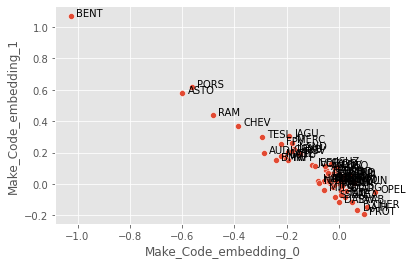

In [68]:
prefix = 'Make_Code'
x,y = 0,1


ax = sns.scatterplot(
    x=f'{prefix}_embedding_{x}',
    y=f'{prefix}_embedding_{y}', 
    data=dfs[prefix], legend='auto')

label_point(f'{prefix}_embedding_{x}', 
            f'{prefix}_embedding_{y}',
            dfs[prefix], ax)

plt.show()

In [ ]:
# save embeddings

